# Sentiment Classification

### Dataset
- Dataset of 50,000 movie reviews from IMDB, labeled by sentiment positive (1) or negative (0)
- Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers).
- For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".
- As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

Command to import data
- `from tensorflow.keras.datasets import imdb`

In [1]:
# Import the necessary libraries

In [2]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [ ]:
import nltk
!python -m nltk.downloader all

In [4]:
from tensorflow.keras.datasets import imdb
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.corpus import stopwords

In [5]:
max_len = 300
vocab_size=10000

In [6]:
stop_words = stopwords.words('english')
punctuations = list(string.punctuation)
stop_words += punctuations

In [7]:
word_number_mapping=imdb.get_word_index()
number_word_mapping = dict([(value, key) for key, value in word_number_mapping.items()])

1646592/1641221 [==============================] - 0s 0us/step


### Import the data (4 Marks)
- Use `imdb.load_data()` method
- Get train and test set
- Take 10000 most frequent words

In [8]:
X_train,Y_train=imdb.load_data()[0][0],imdb.load_data()[0][1]
X_test,Y_test=imdb.load_data()[1][0],imdb.load_data()[1][1]

17465344/17464789 [==============================] - 0s 0us/step


In [9]:
def top_10000_words(words):
  new_words=[]
  for i in words:
    if i<=10000:
      new_words.append(i)
    else:
      continue
  return new_words

In [10]:
clean_X_train=[]
for i in range(0,len(X_train)):
  if i>len(X_train):
    break
  else:
    clean_X_train.append(top_10000_words(X_train[i]))

In [11]:
clean_X_test=[]
for i in range(0,len(X_test)):
  if i>len(X_test):
    break
  else:
    clean_X_test.append(top_10000_words(X_test[i]))

### Pad each sentence to be of same length (4 Marks)
- Take maximum sequence length as 300

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_X_train = pad_sequences(maxlen=max_len, sequences=clean_X_train, padding="post", value=0)
padded_X_test = pad_sequences(maxlen=max_len, sequences=clean_X_test, padding="post", value=0)

### Print shape of features & labels (4 Marks)
Number of review, number of words in each review

In [13]:
print('Number of words in each review:',len(padded_X_train[0]))

Number of words in each review: 300


In [14]:
print('Number of Training Reviews:',len(padded_X_train))

Number of Training Reviews: 25000


In [15]:
print('Number of Testing Reviews:',len(padded_X_test))

Number of Testing Reviews: 25000


Number of labels

In [16]:
print('Number of Training Labels:',len(Y_train))

Number of Training Labels: 25000


In [17]:
print('Number of Testing Labels:',len(Y_test))

Number of Testing Labels: 25000


### Print value of any one feature and it's label (4 Marks)
Feature value

In [18]:
print('Feature words in 10th review:', number_word_mapping[padded_X_train[10][0]])
print('Feature words in 10th review:', number_word_mapping[padded_X_train[10][1]])
print('Feature words in 10th review:', number_word_mapping[padded_X_train[10][2]])
print('Feature words in 10th review:', number_word_mapping[padded_X_train[10][3]])
print('Feature words in 10th review:', number_word_mapping[padded_X_train[10][4]])

Feature words in 10th review: objects
Feature words in 10th review: relief
Feature words in 10th review: level
Feature words in 10th review: names
Feature words in 10th review: dunne


Label value

In [19]:
print('Sentiment of 10th review:',Y_train[10])

Sentiment of 10th review: 1


### Decode the feature value to get original sentence (4 Marks)
First, retrieve a dictionary that contains mapping of words to their index in the IMDB dataset

In [20]:
word_number_mapping=imdb.get_word_index()
number_word_mapping = dict([(value, key) for key, value in word_number_mapping.items()])

Now use the dictionary to get the original words from the encodings, for a particular sentence

In [21]:
def creating_word_mappings(word_number_mappings, number_word_mappings, words):
  keywords=[]
  c1,c2=0,0
  for i in words:
    # print(i,number_word_mapping[i])
    c1=c1+1
    if i in number_word_mapping.keys() and int(i)<=10000: 
      c2=c2+1
      keywords.append(number_word_mapping[i])
    else:
      continue
  # print(c1,c2)
  return keywords

In [22]:
x_train,x_test=[],[]
for i in range(0,len(X_train)):
  if i>len(X_train):
    break
  else:
    x_train.append(" ".join([i.lower() for i in creating_word_mappings(word_number_mapping,number_word_mapping,clean_X_train[i])]))
    x_test.append(" ".join([i.lower() for i in creating_word_mappings(word_number_mapping,number_word_mapping,clean_X_test[i])]))

#### Final Dataset
Get the sentiment for the above sentence
- positive (1)
- negative (0) 

In [23]:
print(x_train[1])
print('Sentiment of above statement:',Y_train[1])

the thought solid thought senator do making to is spot nomination assumed while he of jack in where picked as getting on was did hands fact characters to always life thrillers not as me can't in at are br of sure your way of little it strongly random to view of love it so principles of guy it used producer of where it of here icon film of outside to don't all unique some like of direction it if out her imagination below keep of queen he diverse to makes this stretch of solid it thought begins br senator budget worthwhile though ok awaiting for ever better were diverse for budget look kicked any to of making it out follows for effects show to show cast this family us scenes more it severe making senator to finds tv tend to of emerged these thing wants but an beckinsale cult as it is video do you david see scenery it in few those are of ship for with of wild to one is very work dark they don't do dvd with those them
Sentiment of above statement: 0


In [69]:
print(x_train[3])
print('Sentiment of above statement:',Y_train[3])

the of they halfway of identity went plot actors watch of share was well these can this only ten so failing feels only novak killer theo of bill br would find of films saw grade about hated it for br so ten remain by in of songs are of gigantic is morality it's her or know would care i i br screen that obvious plot actors new would with paris not have attempt lead or of too would local that of every their it coming this eleven of information to br singers movie was anxious that film is under by left this is entertainment ok this in own be house of sticks worker in bound my i i obviously sake things just as lost lot br comes never like thing start of obviously comes indeed coming want no bad than history from lost comes accidentally young to movie bad facts dream from reason these honor movie elizabeth it's movie so fi enough to computer duo film almost jeffrey rarely obviously alive to appears i i only human it just only hop to be hop new made comes evidence blues high in want to other

In [24]:
from tensorflow.keras.preprocessing.text import one_hot
onehot_x_train=[one_hot(i,vocab_size) for i in x_train]
onehot_x_test=[one_hot(i,vocab_size) for i in x_test] 

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_X_train = pad_sequences(maxlen=max_len, sequences=onehot_x_train, padding="post", value=0)
padded_X_test = pad_sequences(maxlen=max_len, sequences=onehot_x_test, padding="post", value=0)

### Define model (10 Marks)
- Define a Sequential Model
- Add Embedding layer
  - Embedding layer turns positive integers into dense vectors of fixed size
  - `tensorflow.keras` embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unique integer number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn LabelEncoder.
  - Size of the vocabulary will be 10000
  - Give dimension of the dense embedding as 100
  - Length of input sequences should be 300
- Add LSTM layer
  - Pass value in `return_sequences` as True
- Add a `TimeDistributed` layer with 100 Dense neurons
- Add Flatten layer
- Add Dense layer

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Input, Flatten, BatchNormalization

In [49]:
model=Sequential()
input_layer = Input(shape=(max_len,)) # Input layer
model.add(input_layer)
embedding_layer=Embedding(input_dim=vocab_size, output_dim=100, input_length=max_len)
model.add(embedding_layer)
lstm_layer=LSTM(units=100, return_sequences=True, recurrent_dropout=0.01)
model.add(lstm_layer)
model.add(TimeDistributed(Dense(100, activation="tanh")))
model.add(Flatten())
model.add(Dense(units=64,activation='tanh',use_bias=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(units=32,activation='tanh',use_bias=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(units=16,activation='relu',use_bias=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))
output_layer=Dense(units=1,activation='sigmoid',use_bias=True)
model.add(output_layer)

### Compile the model (4 Marks)
- Use Optimizer as Adam
- Use Binary Crossentropy as loss
- Use Accuracy as metrics

In [50]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
ad = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
sgd= SGD(learning_rate=0.01, momentum=0.6, nesterov=True, name="SGD")
model.compile(optimizer=ad, loss="binary_crossentropy", metrics=["accuracy"])

In [51]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True, save_weights_only=True)
stop = EarlyStopping(monitor="val_loss", patience=5)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.001, patience=5, min_lr=1e-20, verbose=1)
callbacks=[checkpoint,stop,reduce_lr]

### Print model summary (4 Marks)

In [52]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 300, 100)          1000000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 300, 100)          80400     
_________________________________________________________________
time_distributed_4 (TimeDist (None, 300, 100)          10100     
_________________________________________________________________
flatten_4 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                1920064   
_________________________________________________________________
batch_normalization_12 (Batc (None, 64)                256       
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)               

### Fit the model (4 Marks)

In [53]:
import numpy as np
history = model.fit(padded_X_train, np.array(Y_train), validation_data=(padded_X_test,Y_test), batch_size=100, epochs=100, verbose=1,callbacks=callbacks)

Epoch 1/100
250/250 [==============================] - ETA: 0s - loss: 0.8640 - accuracy: 0.5088
Epoch 00001: val_loss improved from inf to 0.73557, saving model to model-0.74.h5
250/250 [==============================] - 108s 430ms/step - loss: 0.8640 - accuracy: 0.5088 - val_loss: 0.7356 - val_accuracy: 0.5000
Epoch 2/100
250/250 [==============================] - ETA: 0s - loss: 0.8065 - accuracy: 0.5266
Epoch 00002: val_loss improved from 0.73557 to 0.71814, saving model to model-0.72.h5
250/250 [==============================] - 106s 423ms/step - loss: 0.8065 - accuracy: 0.5266 - val_loss: 0.7181 - val_accuracy: 0.5042
Epoch 3/100
250/250 [==============================] - ETA: 0s - loss: 0.7676 - accuracy: 0.5540
Epoch 00003: val_loss improved from 0.71814 to 0.67342, saving model to model-0.67.h5
250/250 [==============================] - 105s 422ms/step - loss: 0.7676 - accuracy: 0.5540 - val_loss: 0.6734 - val_accuracy: 0.5859
Epoch 4/100
250/250 [=============================

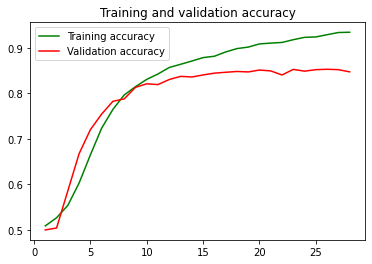

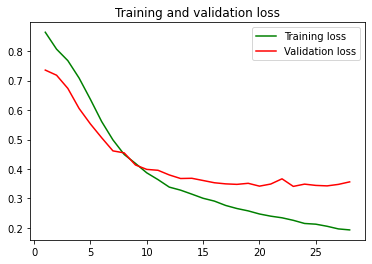

In [55]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [58]:
predictions=model.predict(padded_X_test)

### Evaluate model (4 Marks)

In [63]:
from tensorflow.keras.metrics import BinaryAccuracy
bacc=BinaryAccuracy(name="accuracy", dtype=None)
bacc.update_state(Y_test,predictions)
print('Final Accuracy value on Test Data:',bacc.result().numpy())

Final Accuracy value on Test Data: 0.84716


### Predict on one sample (4 Marks)

In [66]:
index=4
sent=[]
for i in padded_X_test[index]:
  if i==0:
    continue
  else:
    sent.append(number_word_mapping[i])
print(" ".join(sent))
print('Prediction value:',predictions[index][0])
print('Actual value:',Y_test[index])

knights management raft shift caught determine occurs woven costume supplies rolling shattering pickup bless racist hmmm character lucky lucky hmmm character pretentious medium clear meets officer epitome root allen's aftermath richly dominate richly picture bite jodie imagination layers autobiography alleged weakest pickup madness floating icy picture jodie wonder ritual intellectual occurs bubble macabre hmmm character accompanied explanation pickup accompanied started contrary lucky lucky intellectual feat hmmm holt z bless seed intellectual feat characterizations hadley sans stretched existential meets education dominic hmmm character berkeley ewan allen's aftermath lucky lucky peck eleven eleven jenna unimaginative ever root concentrate sentimentality unimaginative eli unimaginative mills unimaginative
Prediction value: 0.9119197
Actual value: 1
